In [1]:
import pandas as pd
import numpy as np

In [5]:
# import data from csv file, set it up as a Pandas data table
path = 'Sample Data  - Sheet1.csv' 
data = pd.read_csv(path)
data.head(5) # forget unnamed for now

,grade,class_size,is_female,morning_class
0,70,35,0,1
1,85,23,1,0
2,86,28,0,1
3,92,13,0,1
4,89,15,0,1


In [6]:
# setup X and y data
# Note that X is the features and y is the target we want to predict
X = data[['class_size', 'is_female', 'morning_class']]
y = data.grade

# setup test split, model randomly chooses students to predict their grade
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [7]:
# setup RandomForestRegressor, we use this to predict student grades
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [8]:
# Setup for a grid search, we use a search grid to test multiple parameters and find the best one
from sklearn.model_selection import GridSearchCV
depth_list = [2,4,8,16,32]
param_dic = {'max_depth': depth_list}
# additionally, clf above has class_weight = 'balanced' in the parameters

grid = GridSearchCV(clf,param_dic, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 32]},
             scoring='neg_mean_squared_error', verbose=1)

In [9]:
# from the grid search, select the best one then make predictions from it
best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test) # from the people being tested, predict their grades


In [10]:
# from the best pipe, give the importances of the features given
best_pipe.feature_importances_

array([0.98465277, 0.00610828, 0.00923895])

In [11]:
# print a list of grades predicted
np.floor(y_test_pred).tolist()

[81.0, 77.0, 94.0, 94.0, 94.0, 94.0, 73.0, 89.0]

In [12]:
# print a list of the actual grades
y_test.values

array([79, 77, 97, 95, 94, 95, 73, 89], dtype=int64)

In [13]:
X_train.head(5)

,class_size,is_female,morning_class
7,23,1,0
1,23,1,0
27,27,0,1
28,11,1,1
18,13,1,0


In [14]:
y_train.head(5)

7     82
1     85
27    68
28    99
18    87
Name: grade, dtype: int64

In [15]:
# print predicted and actual grades side by side
testLength = len(y_test)
for i in range(testLength):
    print('predicted grade: ', np.floor(y_test_pred[i]), 'actual grade: ', y_test.values[i])

predicted grade:  81.0 actual grade:  79
predicted grade:  77.0 actual grade:  77
predicted grade:  94.0 actual grade:  97
predicted grade:  94.0 actual grade:  95
predicted grade:  94.0 actual grade:  94
predicted grade:  94.0 actual grade:  95
predicted grade:  73.0 actual grade:  73
predicted grade:  89.0 actual grade:  89


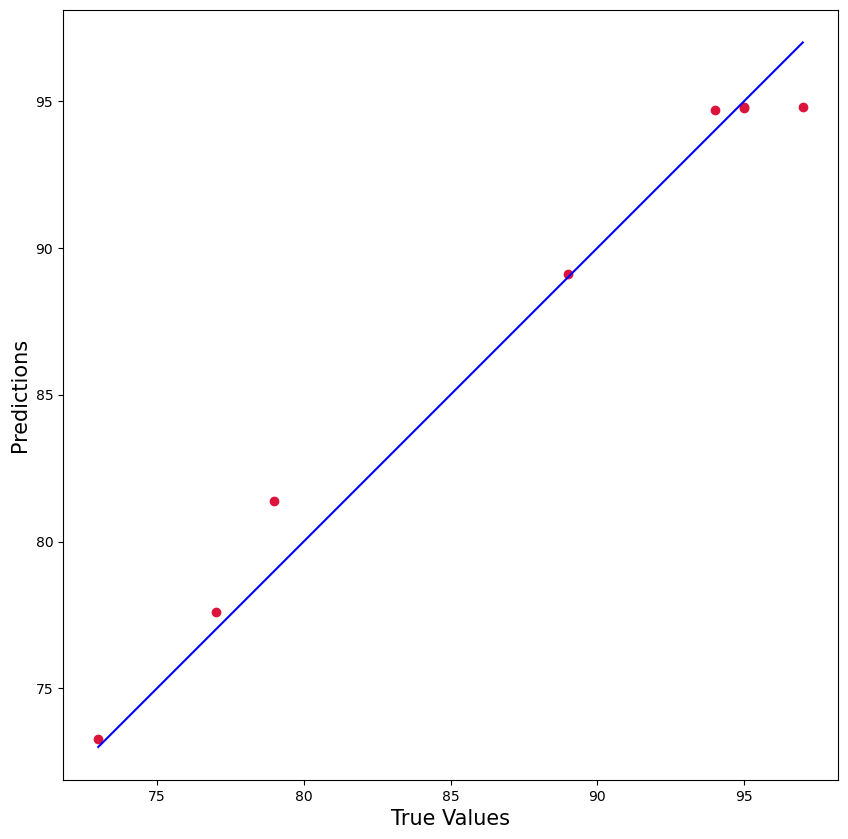

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)


# plot from SOF https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def TestPipe(y,y_pred):
    print('params:',grid.best_params_)
    # MSE
    print('MSE:',np.sqrt(mean_squared_error(y,y_pred)))
    # MAE
    print('MAE:',mean_absolute_error(y,y_pred))
    # MAPE
    print('MAPE', mean_absolute_percentage_error(y,y_pred))

TestPipe(y_test,y_test_pred)

params: {'max_depth': 2}
MSE: 1.200498989982588
MAE: 0.8421419453063876
MAPE 0.00974967962580307
